<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula7b_MLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def criaDataset(n=100, centros=3):
  X, y = make_blobs(n_samples=n, centers=centros, cluster_std=0.2)
  return X, y

def plotDataset(X, y):
  plt.xlabel("x1")
  plt.ylabel("x2")
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)


In [95]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

def defineAxes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

# X, y = criaDataset(centros=15)
clf = MLPClassifier(max_iter=500)
clf.fit(X, y), accuracy_score(clf.predict(X), y), cross_validate(clf, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

(MLPClassifier(max_iter=500),
 0.94,
 {'fit_time': array([0.82215309, 0.73887515, 0.78950453, 0.46215916, 0.30010915]),
  'score_time': array([0.00127244, 0.00118423, 0.00350428, 0.00132847, 0.00153279]),
  'test_score': array([0.95, 0.9 , 0.95, 0.95, 0.95])})

4/4 [==============================] - 0s 3ms/step


0.95

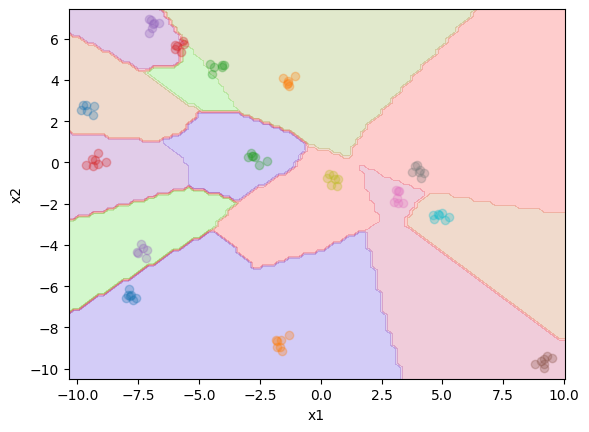

In [122]:
from sklearn.preprocessing import label_binarize
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras

class MLPKeras(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=500, n_hidden=[100]):
    self.max_iter = max_iter
    self.n_hidden = n_hidden

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.models.Sequential()
    self.model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))
    for h in self.n_hidden:
      self.model.add(keras.layers.Dense(h, activation='relu'))
    self.model.add(keras.layers.Dense(yhot.shape[1]))
    self.model.add(keras.layers.Activation('softmax'))
    self.model.compile(loss='categorical_crossentropy')
    self.model.fit(X, yhot, epochs=self.max_iter, verbose=0)
    return self

  def predict_proba(self, X):
    return self.model.predict(X)

  def predict(self, X):
    predictions = self.predict_proba(X)
    ypred = self.labels[np.argmax(predictions, axis=1)]
    return ypred

# X, y = criaDataset(centros=5)
clf = MLPKeras()
clf.fit(X, y)
plotDataset(X, y)
plotPredictions(clf, X)
ypred = clf.predict(X)
accuracy_score(y, ypred)

In [123]:
clf.fit(X, y), accuracy_score(clf.predict(X), y), cross_validate(clf, X, y)

1/1 [==============================] - 0s 52ms/step


(MLPKeras(),
 0.94,
 {'fit_time': array([5.58901787, 4.04847813, 3.36554456, 5.61383939, 5.79973602]),
  'score_time': array([0.11411023, 0.11415005, 0.11323476, 0.15293193, 0.11126757]),
  'test_score': array([1.  , 0.95, 0.95, 0.95, 1.  ])})